In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

Loda the csv file
---

In [3]:
df=pd.read_csv(r"data.csv")

In [4]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Drop the unwanted columns
---

In [5]:
df=df.drop(['Unnamed: 32','id'],axis=1)

change the Target values 
---

In [ ]:
df['diagnosis']=df['diagnosis'].map({'B':0,'M':1})#M- Malignant, B- Benign

Split the raw data to train,val,test datas
---

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_val,test=train_test_split(df,test_size=0.2,random_state=42)
train,val=train_test_split(train_val,test_size=0.25,random_state=42)

In [10]:
print(train.shape,
val.shape,
test.shape)

(341, 31) (114, 31) (114, 31)


In [11]:
train.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
217,0,10.200,17.48,65.05,321.2,0.08054,0.05907,0.05774,0.01071,0.1964,...,11.48,24.47,75.40,403.7,0.09527,0.1397,0.19250,0.03571,0.2868,0.07809
283,1,16.240,18.77,108.80,805.1,0.10660,0.18020,0.19480,0.09052,0.1876,...,18.55,25.09,126.90,1031.0,0.13650,0.4706,0.50260,0.17320,0.2770,0.10630
0,1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.71190,0.26540,0.4601,0.11890
504,0,9.268,12.87,61.49,248.7,0.16340,0.22390,0.09730,0.05252,0.2378,...,10.28,16.38,69.05,300.2,0.19020,0.3441,0.20990,0.10250,0.3038,0.12520
251,0,11.500,18.45,73.28,407.4,0.09345,0.05991,0.02638,0.02069,0.1834,...,12.97,22.46,83.12,508.9,0.11830,0.1049,0.08105,0.06544,0.2740,0.06487


In [12]:
target='diagnosis'
feature=list(train.columns)[1:]

In [13]:
train_in=train[feature]
train_out=train[target]

In [14]:
val_in=val[feature]
val_out=val[target]

In [15]:
test_in=test[feature]
test_out=test[target]

In [16]:
list(test_out)

[0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1]

Using MinMaxScaler we reduce the input value size
---

In [17]:
scalar=MinMaxScaler()

In [18]:
scalar.fit(df[feature])

MinMaxScaler()

In [ ]:
list(scalar.data_max_)#maximum values 

[np.float64(28.11),
 np.float64(39.28),
 np.float64(188.5),
 np.float64(2501.0),
 np.float64(0.1634),
 np.float64(0.3454),
 np.float64(0.4268),
 np.float64(0.2012),
 np.float64(0.304),
 np.float64(0.09744),
 np.float64(2.873),
 np.float64(4.885),
 np.float64(21.98),
 np.float64(542.2),
 np.float64(0.03113),
 np.float64(0.1354),
 np.float64(0.396),
 np.float64(0.05279),
 np.float64(0.07895),
 np.float64(0.02984),
 np.float64(36.04),
 np.float64(49.54),
 np.float64(251.2),
 np.float64(4254.0),
 np.float64(0.2226),
 np.float64(1.058),
 np.float64(1.252),
 np.float64(0.291),
 np.float64(0.6638),
 np.float64(0.2075)]

In [ ]:
list(scalar.data_min_)#min values

[np.float64(6.981),
 np.float64(9.71),
 np.float64(43.79),
 np.float64(143.5),
 np.float64(0.05263),
 np.float64(0.01938),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.106),
 np.float64(0.04996),
 np.float64(0.1115),
 np.float64(0.3602),
 np.float64(0.757),
 np.float64(6.802),
 np.float64(0.001713),
 np.float64(0.002252),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.007882),
 np.float64(0.0008948),
 np.float64(7.93),
 np.float64(12.02),
 np.float64(50.41),
 np.float64(185.2),
 np.float64(0.07117),
 np.float64(0.02729),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.1565),
 np.float64(0.05504)]

In [20]:
train_in[feature]=scalar.transform(train_in[feature])
val_in[feature]=scalar.transform(val_in[feature])
test_in[feature]=scalar.transform(test_in[feature])

C:\Users\sanja\AppData\Local\Temp\ipykernel_4420\1542917161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_in[feature]=scalar.transform(train_in[feature])
C:\Users\sanja\AppData\Local\Temp\ipykernel_4420\1542917161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_in[feature]=scalar.transform(val_in[feature])
C:\Users\sanja\AppData\Local\Temp\ipykernel_4420\1542917161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

we can see the difference here
---

In [ ]:
train_in.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,...,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000
mean,0.332268,0.318504,0.326451,0.211712,0.390940,0.254246,0.200232,0.234369,0.383871,0.269382,...,0.291555,0.358350,0.278217,0.167458,0.398758,0.215037,0.210895,0.386814,0.266614,0.187798
std,0.164389,0.141954,0.165191,0.146545,0.130450,0.165308,0.185427,0.189919,0.142330,0.156107,...,0.172374,0.159304,0.167639,0.142196,0.154633,0.152456,0.160643,0.227713,0.126462,0.118234
min,0.033603,0.000000,0.028540,0.011410,0.000000,0.000000,0.000000,0.000000,0.054040,0.000000,...,0.026610,0.000000,0.020320,0.009438,0.066565,0.006821,0.000000,0.000000,0.000000,0.000000
25%,0.220029,0.223537,0.213461,0.114146,0.299630,0.129471,0.061809,0.095626,0.282828,0.161542,...,0.179651,0.244136,0.165347,0.080785,0.282837,0.107508,0.086821,0.216357,0.189237,0.102781
50%,0.294335,0.308083,0.288093,0.167508,0.377088,0.205632,0.135286,0.161531,0.373232,0.246420,...,0.248310,0.351812,0.232880,0.120306,0.390477,0.173094,0.171805,0.338866,0.251528,0.161157
75%,0.410762,0.400744,0.407781,0.260912,0.471879,0.338998,0.285380,0.336581,0.457576,0.338037,...,0.361793,0.463486,0.358534,0.205417,0.494156,0.304945,0.300240,0.537801,0.317564,0.242818
max,0.967343,1.000000,0.988943,1.000000,1.000000,0.895712,1.000000,1.000000,0.850000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.972264,0.883478,0.767412,1.000000,1.000000,0.773711


Here we use the LogisticRegression because it is a classification problem(0 or 1)
---

In [22]:
from sklearn.linear_model import LogisticRegression

This class implements regularized logistic regression using the 'liblinear'.
---
The 'newton-cg', 'sag', and 'lbfgs' solvers support only L2 regularization
 |  with primal formulation, or no regularization. The 'liblinear' solver
 |  supports both L1 and L2 regularization, with a dual formulation only for
 |  the L2 penalty.


In [23]:
model=LogisticRegression(solver='liblinear')

In [33]:
model.fit(train_in,train_out)

LogisticRegression(solver='liblinear')

In [34]:
m1=model.predict(train_in)
m1

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,

In [35]:
train_out

217    0
283    1
0      1
504    0
251    0
      ..
57     1
492    1
418    0
385    1
325    0
Name: diagnosis, Length: 341, dtype: int64

use predict_proba to find the probability of 0 and 1 

In [36]:
train_prob=model.predict_proba(train_in)
train_prob

array([[9.61267008e-01, 3.87329924e-02],
       [1.46798942e-01, 8.53201058e-01],
       [5.95677230e-03, 9.94043228e-01],
       [9.64571030e-01, 3.54289696e-02],
       [9.26428895e-01, 7.35711054e-02],
       [9.72445661e-01, 2.75543390e-02],
       [8.94751996e-01, 1.05248004e-01],
       [8.04136713e-01, 1.95863287e-01],
       [4.93165187e-01, 5.06834813e-01],
       [8.78194334e-01, 1.21805666e-01],
       [8.89227500e-01, 1.10772500e-01],
       [1.99097918e-01, 8.00902082e-01],
       [8.30767199e-01, 1.69232801e-01],
       [6.07484444e-01, 3.92515556e-01],
       [8.96178726e-01, 1.03821274e-01],
       [1.37967707e-01, 8.62032293e-01],
       [9.69004926e-01, 3.09950738e-02],
       [9.44135883e-01, 5.58641174e-02],
       [9.15381877e-01, 8.46181235e-02],
       [2.59863260e-02, 9.74013674e-01],
       [9.23142285e-01, 7.68577147e-02],
       [9.17672112e-01, 8.23278879e-02],
       [9.59649911e-01, 4.03500890e-02],
       [2.01147976e-02, 9.79885202e-01],
       [6.948451

In [37]:
model.classes_

array([0, 1])

Find the accuracy of our prediction using accuracy_score
---

In [38]:
from sklearn.metrics import accuracy_score

training dataset

In [39]:
accuracy_score(train_out,m1)

0.9736070381231672

testing dataset

In [40]:
teat_pre=model.predict(test_in)

In [41]:
accuracy_score(teat_pre,test_out)

0.9649122807017544

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
confusion_matrix(train_out,m1,normalize='true')

array([[0.99537037, 0.00462963],
       [0.064     , 0.936     ]])

In [44]:
mv=model.predict(val_in)

In [45]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

create a fun() for predict and plot

In [46]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));    
    return preds

Accuracy: 95.61%


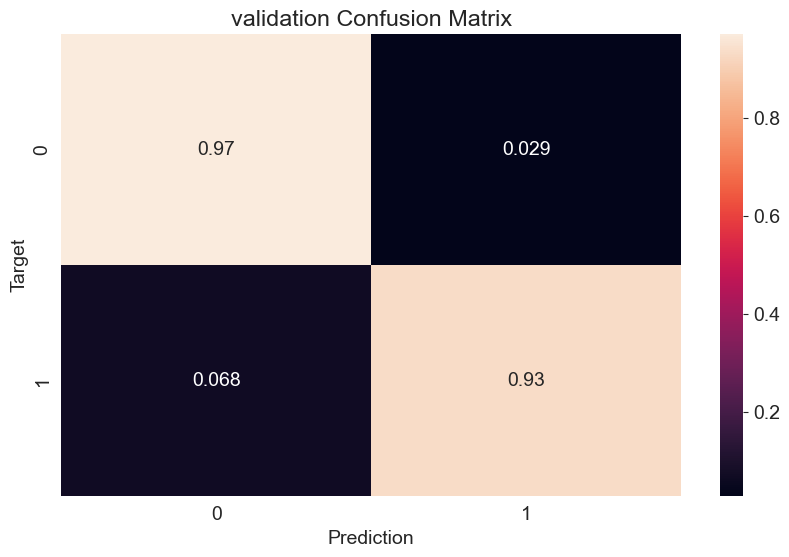

In [47]:
val_pre=predict_and_plot(val_in,val_out,"validation")

Accuracy: 96.49%


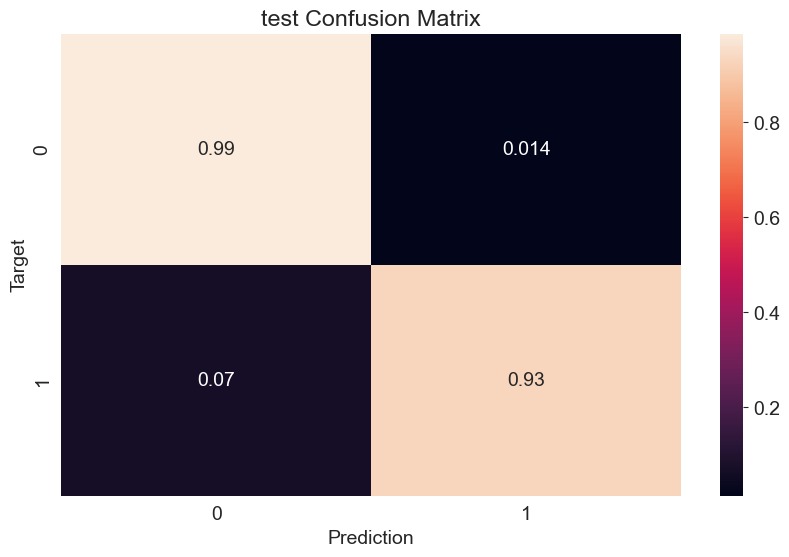

In [48]:
test_per=predict_and_plot(test_in,test_out,'test')